#### In this Iris Flower dataset project, we will build a machine learning model to classify the flower classes within the dataset. Then, we will evaluate and test the model to see if it gives accurate predictions on the data.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics as metrics

Load the data 

In [2]:
iris = pd.read_csv("D:/Data Analysis/CipherByte/Iris Flower.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check for missing value

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dropping the ID column as it won't help us in any prediction

In [4]:
iris.drop('Id', axis = 1, inplace = True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print("The dimension:", iris.shape)

The dimension: (150, 5)


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking for the value counts
count = iris['Species'].value_counts()
count

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

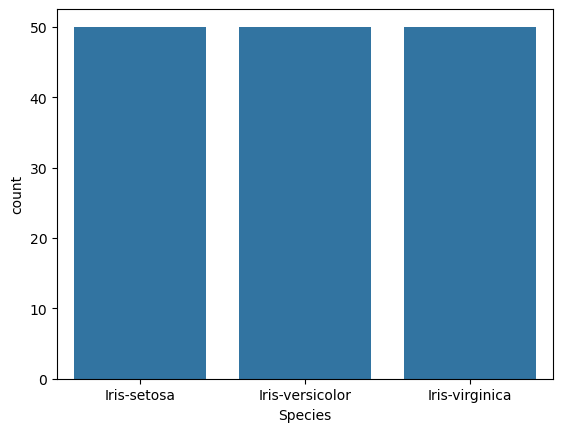

In [9]:
sns.countplot(x='Species', data=iris, )
plt.show()

Visualize the whole dataset

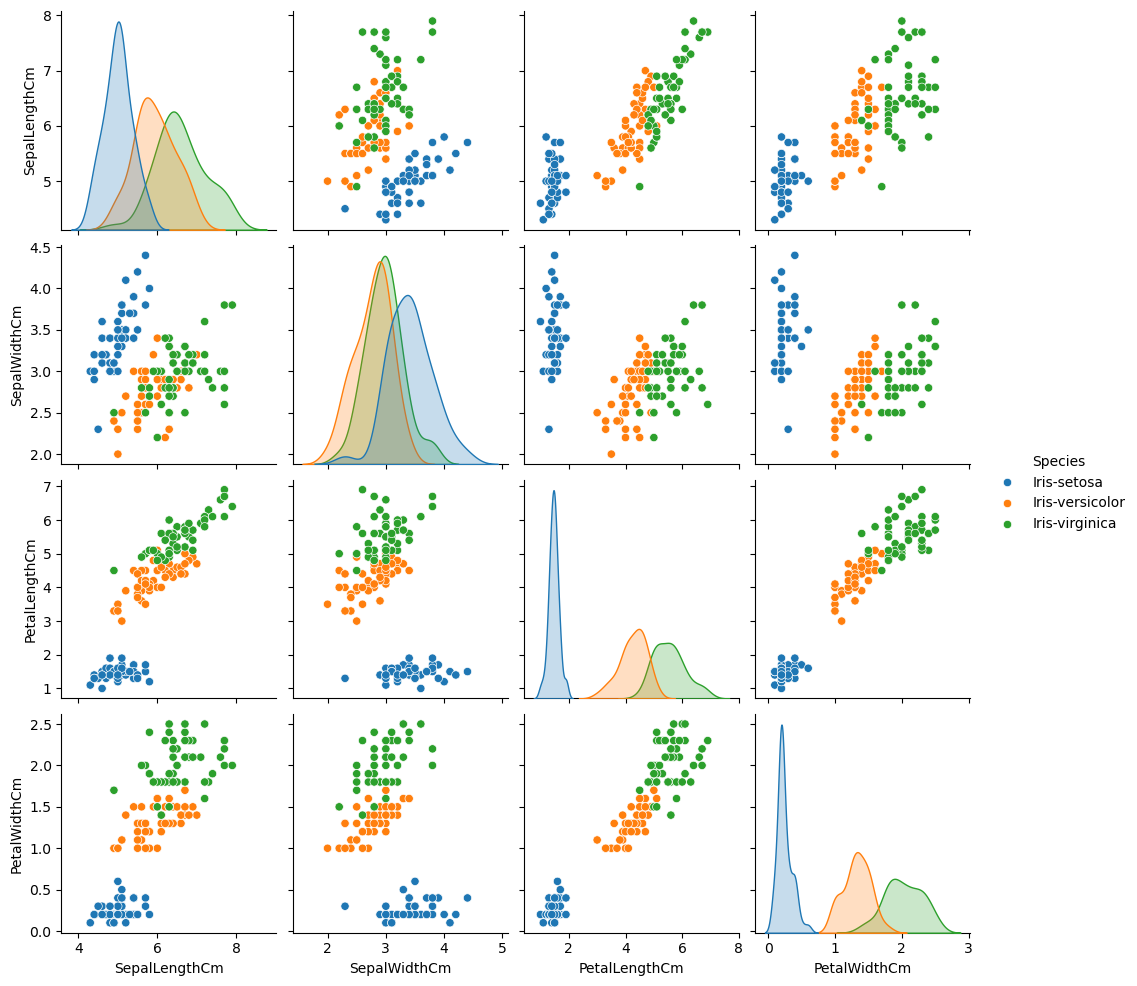

In [10]:
sns.pairplot(iris, hue='Species')
plt.show()

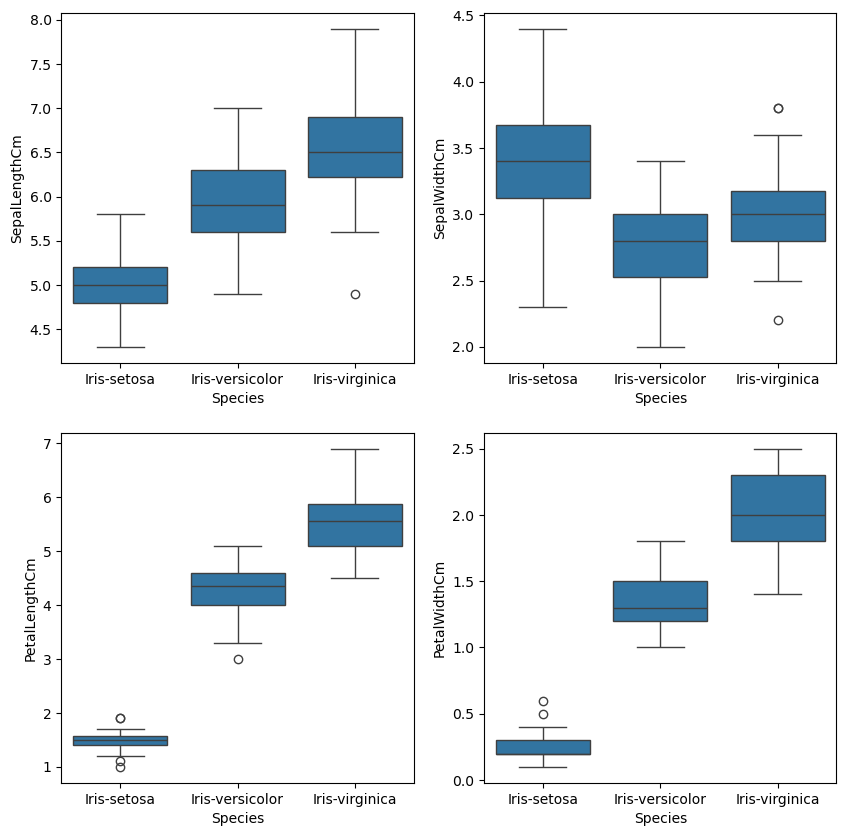

In [11]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=iris)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

In [12]:
# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Training the model

#### Support Vector Machine (SVM)

In [13]:
# Separate features and target  
iris = iris.values
X = iris[:,0:4]
Y = iris[:,4]

In [14]:
# Split the data to train and test the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
# Support vector machine algorithm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

##### Model Evaluation

In [16]:
# Predict from the test dataset
predictions = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

##### Model Testing

In [17]:
model.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

The model appears accurate.

#### Logistic Regression

In [21]:
# Train a logistic regression model on the training data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9333333333333333


##### Model Evaluation

In [19]:
# Evaluate the performance of the model on the test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 0.9333333333333333


#### KNN (K-Nearest Neighbors)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.86      0.86         7
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

[[12  0  0]
 [ 0  6  1]
 [ 0  1 10]]
accuracy is 0.9333333333333333


#### Conclusion:
Successfully created a classifier for the Iris Flower Classification Project.